# 주제: 기계학습을 통한 문제해결과정(classification)
작성자: 정용민

# Part I.  목적 및 주안점
![](./figures/fig0.png)  


* **영어& 수학 공부 analogy:** 
    - 단어공부 -> 문법공부 -> 회화마스터 (X);  자막 안나온 미드 보기 -> 영어공부[덩이리 -> 단어/문법 ] (O)
    - 미분공식 -> 미분 (X); 도함수의 이해& 미분의 목적 -> 미분법 공부 (O)
    - 전체를 경험&목적을 이해 -> 각론 격파
    
* **머신러닝:**
    - 한 사이클 돌아보고 감을 잡아보는게 중요
    - 문제를 직접 해결해보는건 더 중요!(Mission-Oriented, 특히 명시적 문제가 아닌 암시적 문제를 해결할때)   
    **e.g. 꽃받침sepal과 꽃잎petal의 길이로 3가지 벚꽃 품종 '분류'하기 (easy, explicit, 튜토리얼 접근 방식)
    e.g. 스팸메일 판독기 만들기 / 타이타닉 사고에서 당신은 살 수 있었을 것인가? / 합리적인 자동차 보험 요율 산정하기/ 최소한의 마케팅 비용으로 최대 고객 유입 효과 만들기 (implicit, 문제정의 필요)**
    - 그다음 머신러닝 알고리즘 [개념/각론](http://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/) 파헤치기
    
* **문제해결 방법**
    - 문제정의
    - 가설수립
    - 실험
    - 측정/평가
    - (**repeat again! a.k.a. 삽질 & feat. 무한한 구글링**)
    
*** 린프로세스와 유사:  "문제정의/가설수립 (idea) -> 실험 (build) -> 측정/평가(measure)" ***

![](./figures/fig1a-lean.png)    
    

* **Covered & NOT Covered:**  
(+)Python 사용 겉핥기  
(+)기계학습 알고리즘 겉핥기  
(+)기계학습(for Classification Problem) 기본 절차 (=삽질과정)   
(-)python syntax BUT 쪼금은 맛봅니다  
(-)MachineLearning Algorithm Detail BUT 쪼금은 맛봅니다  
(-)MachineLearing library usage BUT 쪼금은 맛봅니다  

### Before Start: 
* Python vs R [(link)](http://datascience.stackexchange.com/questions/326/python-vs-r-for-machine-learning/339)
    - Product Ready: full-fledged language, more adopted in industry (R: academic)
    - powerfull library: scikit-learn, statsmodel, SciPy, **tensorflow**
    - See through what's going on
    - growing SW engineer's skillset & mindset
    - more room for performance improvements (provided performance tuning in python)
    - ipython (REPL)
    - 풍부한 교육 자료(MOOCs)/오픈 프로젝트 [(Language Trends on GitHub) ](http://githut.info) / [redmonk 순위](http://okky.kr/article/322344) 
* [Python installation (using anaconda)](https://medium.com/@younggun/anaconda-fe67e9c9709d#.vn3yo2wg6)
    - anaconda는 python 패키지 매니저/유틸리티 프로그램임
* 3rd library installation
    - ipython/jupyter `conda install ipython`
    - pandas, numpy, scikit-learn `conda install XXXX`
    
### STUDY Material (elementary level):
(Python)  
찝어주기 어려울 정도로 많음. 거의 모든 오픈코스에서 제공.
- [codecademy.com](https://www.codecademy.com)
- [점프투파이썬](https://wikidocs.net/book/1)

(Python Numpy & Pandas)
- [Numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/)
- [Pandas & DataWrangling](http://chrisalbon.com/#Python)

(Machine Learning)  
- 머신러닝이란? : 명시적으로 프로그래밍을 하지 않고도 컴퓨터가 학습할 수 있는 능력을 갖게 하는 것
- [Coursera/Machine Learning, AndrewNg](https://www.coursera.org/learn/machine-learning)
- [elice.io](https://www.elice.io/)(MachineLearning online summer school) 
- [Udacity/Intro to DataAnalysis/Udacity](https://www.udacity.com/course/intro-to-data-analysis--ud170)
- [Udacity/Intro to Data Science](https://www.udacity.com/course/intro-to-data-science--ud359)
    

# Part II.  사례 풀어보기

* 차량데이터 형상 및 이해:   
OBD PID 데이터( On-board diagnostics Parameter IDs)- 실험에 쓰이는 차량 센서값 데이터들 총칭  
DTC(Diagnostic Trouble Codes) - 차량 에러코드 e.g. P0171(System Too Lean; 엔진탈탈거림, 가속이상 )
MIL - 1:에러 0:정상
![](./figures/fig2-pid.png)


# 1. Problem Definition & Hypothesis
* Mission Statement(or Requirements):"차량 고장을 예측하고 싶다"
* Problem Definition: 
    - 문제의 목적(Objective), 범위(Scope), 한계점(Constraint)를 정의한다
    - 위 사항을 최대한 수행가능(Actionable)한 구체적(Specific) 형태, 측정가능(Measurable)한 형태로!
    --> 암시적 형태의 문제정의를 명시적 형태로!  
    --> requirement와 system spec으로 이어짐!  

e.g. 우리 회사 서비스가 '잘' 되고 있나요? -> Monthly Active User? Churn-it/out rate, Retention rate, Customer Long-term Value이 성장하고 있나요?  
    - 커뮤니케이션시에도 요구사항을 최대한 objective를 actionable&measurable한 형태로 주면 좋다. 없으면 같이 만들어 간다.

* let's define the problem better!  
차량고장을 예측하고 싶다  
    => 차량고장이 왜 일어나는지 알고 싶다  
    => 차량고장이 가지는 특성을 알고싶다  
    **=> 정상차량과 고장차량의 특성차이를 통해 고장차량만이 가지는 특성을 파악하고 싶다**

이정도면 좋은 problem definition? --> 분석과정에도 끊임없이 바뀌고 상세화됨.  


## ::: Experiment#1~3

![](./figures/fig2-ex1a.png)
![](./figures/fig2-ex1b.png)
![](./figures/fig2-ex1c.png)

고장시점 기준으로 시계열적 변화가 뚜렷하지 않거나, 실험데이터에 내재한 한계 (고장기간, 고장시점 등)로 파악하기 힘듬.  
실제 분석에서는 중요한 단계로 필수적으로 진행했으나, 현 강의에는 다루지 않음 

![](./figures/fig2-ex2a.png)


**<U>'고장(MIL=1)'난 차량이 아니고 '특정 고장(DTC)'를 기준으로 분석할 필요!!</U>**  
**<U>그리고 실험 원칙에 따라 비교집단들은 최대한 동질적(=브랜드,차종,차량타입[승용/SUV..],엔진배기량,연식, 주행시기..)이어야함 i.e.변인 통제 중요</U>**
(변인 통제가 전혀 안될때의 문제 예)

![](./figures/fig2-ex2b.png)


![](./figures/fig2-ex3.png)


* Final Problem Definition  
차량고장을 예측하고 싶다  
=> 차량고장이 왜 일어나는지 알고 싶다  
=> 차량고장이 가지는 특성을 알고싶다  
=> 정상차량과 고장차량의 특성차이를 통해 고장차량만이 가지는 특성을 파악하고 싶다  
=> **주어진 PID 데이터를 통해 [특정 고장(DTC)]를 겪는 차량과 [변인통제가 잘된 정상차량]을 구분할 수 있는 차이점/구분기준을 규명하겠다. w/ 한계점; Classification problem**   



당연한 것처럼 보이지만, 객관식과 주관식 문제의 차이처럼, 처음에 데이터 테이블에서 이런 가설을 단번에 만들기란 쉽지 않음. '데이터가 어떤 데이터를 쓰세요' 하고 말하지 않는다.도메인 전문가의 도움과 커뮤니케이션 필수!

# 2. Build
- *강의를 위해 많은 생략과 변형을 거친 코드&데이터임.*  
- *편의를 위해 procedural code 형식*

![](./figures/fig3-process.png)

또는 [링크참고](http://blog.kaggle.com/2016/07/21/approaching-almost-any-machine-learning-problem-abhishek-thakur/ )

![](./figures/fig3-process2.png)

## ::: Data Selection & Loading
"" 특정 DTC(P0171)를 가진 고장차량과 변인이 현실껏 통제된(배기량) 정상차량의 PID 데이터 ""


In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from pandas.tools.plotting import scatter_matrix

from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
import subprocess

""" for Random Forest"""
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

* functions in use:   

In [27]:
def df_asType(rawDF):
    """Type Conversion"""
    for column in rawDF.columns:
        if column in ['REPORT_DATE', 'CAR_NO', 'SFT_B1','LOAD_ABS', 'TP_REL', 'FLI', 'REG_DATE' ]: # - MAP
            pass
        elif column == 'MIL':
            # rawDF[column] = rawDF[column].apply(toBoolean)
            # Pandas에서 컬럼 이름이 boolean일때 Plot할때 문제 일으킴
            pass
        else:
            try:
                rawDF[column] = pd.to_numeric(rawDF[column], errors = 'coerce')
            except: print "**ERROR: type change failed: ", column
    return None

def filter_df(inDF, column, thres):
    """
    :param thres (list) = [min, max]
    """
    outDF = inDF[(inDF[column]>= thres[0] ) & (inDF[column] <= thres[1] )]
    return outDF

def plot_boxwhisker_matrix(inDF):
    PIVOT_MIL = []
    PIVOT_MIL = map(lambda i: inDF.pivot(columns = 'MIL', values = PID_features_target[i]), range(len(PID_features_target)) )

    fig = plt.figure(figsize= (22,12));
    fig.subplots_adjust(hspace=.7, left= .05, right=.95, top=.95, bottom=.05)
    for (i, name, pivot_mil) in zip(range(len(PID_features_target)), PID_features_target, PIVOT_MIL ):
        plt.subplot(3,3,i+1); plt.title(name); sns.boxplot(data=pivot_mil, orient="v", showmeans=True, flierprops = dict(marker='*', markersize=9) )

    return None

def plot_violin_matrix(inDF):
    PIVOT_MIL = []
    PIVOT_MIL = map(lambda i: inDF.pivot(columns = 'MIL', values = PID_features_target[i]), range(len(PID_features_target)) )
        
    fig = plt.figure(figsize= (22,12)); #plt.style.use('ggplot')
    fig.subplots_adjust(hspace=.7, left= .05, right=.95, top=.95, bottom=.05)
    sns.set_style("whitegrid"); sns.despine(); sns.set_style("ticks")
    for (i,name, pivot_mil) in zip (range(len(PID_features)), PID_features, PIVOT_MIL):
        plt.subplot(3,4,i+1); plt.title(name); sns.violinplot(pivot_mil,orient = "v",palette ="Paired")
    return None

def plot_scatter_matrix(inDF):
    number = preprocessing.LabelEncoder()
    inDF['MIL'] = number.fit_transform(inDF['MIL'])

    color_wheel = {1:"#e74c3c", 2:"#3498db" } # 1: blue, 2:red
    colors = temp['MIL'].map(lambda x: color_wheel.get(x+1))
    scatter_matrix(temp, color= colors, alpha = 0.5, figsize = (22,12), diagonal = 'kde' )
    print ">>> Multivariable Scatter_Matrix is acquired."
    return None

def plot_scatter(inDF, pid_x1, pid_x2):
    """
    :param inDF
    :param pid_x1: string, PID for x
    :param pid_x2: string, PID for y
    :return: plot
    """
    if inDF['MIL'].dtype == 'int64':
        mil_ON = inDF.loc[inDF['MIL']==1]
        mil_OFF = inDF.loc[inDF['MIL']==0]
    else:
        mil_ON = inDF.loc[inDF['MIL']=='Y']
        mil_OFF = inDF.loc[inDF['MIL']=='N']

    fig = plt.figure(figsize = (22,12)); plt.style.use('ggplot')
    # plt.xlim(inDF[pid_x1].min(), inDF[pid_x1].max() );plt.ylim(inDF[pid_x2].min() ,inDF[pid_x2].max() )

    #overlap 순서에 유의
    plt.scatter(mil_ON[pid_x1], mil_ON[pid_x2], alpha =0.1,  color = "red", label = "ABNORMAL(=MIL_ON)")
    plt.scatter(mil_OFF[pid_x1], mil_OFF[pid_x2], alpha=0.1, color = "b",  label = "NORMAL(=MIL_OFF)")

    plt.legend(); plt.xlabel(pid_x1); plt.ylabel(pid_x2)
    return None

def plot_decision_bounrary(bx,by,bZ, inDF_1, inDF_2):
    fig = plt.figure(figsize = (22,12)); plt.style.use('ggplot')
    cs = plt.contourf(bx,by,bZ,alpha = 0.3, cmap = plt.cm.RdYlBu_r)
    plt.scatter(inDF_1.TP,inDF_1.MAF, alpha = 1 , c = 'r',label = "ERROR" )
    plt.scatter(inDF_2.TP, inDF_2.MAF, alpha = 1 , c = 'b',label = 'NORMAL')
    # plt.axis("tight"); plt.xlim(x_min,x_max);plt.ylim(y_min,y_max)
    plt.legend(); plt.xlabel("TP"); plt.ylabel("MAF");
    return None

In [28]:
#Data Loading
path = './PID_data_test.csv'
pid_raw_orig = pd.read_csv(path,index_col = 'PID_NO')

In [29]:
#remove sensitive info- 0928
pid_raw_temp=pid_raw_orig.drop(['CAR_NO','REPORT_DATE','REG_DATE'],axis=1)
pid_raw_temp.head(3)

,VSS,RPM,MAP,IAT,MAF,CER,FSS1,SFT_B1,LOAD_PCT,LOAD_ABS,TP,TP_REL,ACCEL_D,MIL,ECT,DIST,AUX_BAT,FLI
PID_NO,,,,,,,,,,,,,,,,,,
89416566,61,1757,55,29,\0,0.9912110000000001,2,\0,23.1373,52.1569,18.0392,8.62745,23.9216,N,87,10091,14.682,32.549
54943850,0,558.5,33,35,3.06,1.0,2,\0,16.8627,16.4706,15.6863,5.09804,14.9020,Y,82,24806,14.053,38.0392
16477310,86,2130.5,59,42,\0,1.0,2,\0,40.7843,33.7255,19.2157,9.80392,24.3137,N,84,41725,14.206,20.0


## :::Pre-Processing (1/)
### (1) Clean up data  
- Drop unncecessary columns(~feature selection? curse of dimension?)     
- Cleaning trash values & NaNs  
- Type conversion  
- Normalization (Optional in this case)

In [30]:
# Indexes in Use
PID_features = ['VSS', 'RPM', 'MAP', 'IAT', 'MAF', 'CER', 'FSS1', 'LOAD_PCT', 'TP', 'ACCEL_D','ECT','AUX_BAT']
drop_col = ['SFT_B1', 'LOAD_ABS', 'TP_REL', 'FLI', 'DIST', 'REG_DATE','VSS','CER','FSS1','ACCEL_D'] 
PID_features_target = [pid for pid in PID_features if pid not in drop_col] 

In [31]:
pid_raw=pid_raw_orig.copy()

# Leave columns that only matter
pid_raw = pid_raw.drop(drop_col, axis=1)
# Replace trash values with NaNs
pid_raw = pid_raw.replace("\\0", np.nan)
#Drop NaN rows in MIL column
pid_raw = pid_raw.dropna(subset = ['MIL'])
#TypeConversion
df_asType(pid_raw)

#remove any sensitive information-0928
pid_raw_temp = pid_raw.drop(['CAR_NO','REPORT_DATE'],axis=1)

In [32]:
pid_raw_temp.head(7)

,RPM,MAP,IAT,MAF,LOAD_PCT,TP,MIL,ECT,AUX_BAT
PID_NO,,,,,,,,,
89416566,1757.0,55,29,NaN,23.1373,18.0392,N,87,14.682
54943850,558.5,33,35,3.06,16.8627,15.6863,Y,82,14.053
16477310,2130.5,59,42,NaN,40.7843,19.2157,N,84,14.206
162175518,870.5,25,35,3.20,10.1961,15.2941,N,92,14.154
161745238,2628.0,24,2,12.18,13.7255,19.6078,Y,81,14.154
71257128,1336.5,61,10,NaN,37.2549,16.0784,N,85,14.394
3954951,586.5,45,47,NaN,32.1569,13.3333,N,88,14.253


### (2) Basic Description


In [33]:
# the number & IDs of unique cars
print "| the total number of cars: ", len(pid_raw.CAR_NO.unique()) #> 76
#MIL_ON
MIL_ON = pid_raw.loc[pid_raw['MIL'] == 'Y' ]
print "| the number of MIL_ON cars: ", len(MIL_ON.CAR_NO.unique())
print "| the IDs of MIL_ON cars: ", MIL_ON.CAR_NO.unique()
# MIL_OFF (= never went through MIL_ON once)
index_MIL_ON = pid_raw[pid_raw['CAR_NO'].isin(MIL_ON.CAR_NO.unique())].index
MIL_OFF = pid_raw.drop(index_MIL_ON)
print "| the number of MIL_OFF cars: ", len(MIL_OFF.CAR_NO.unique())
print "| the IDs of MIL_OFF cars: \n", MIL_OFF.CAR_NO.unique()
print "| intersection btw/ MIL_OFF and MIL_ON?: ",  set(MIL_ON.CAR_NO.unique()).intersection(MIL_OFF.CAR_NO.unique())

#Concat btw/ MIL_OFF + MIL_ON i.e. 순수하게 고장난 상태 vs 한번도 고장난적 없던 차량의 상태
pid_raw = pd.concat([MIL_OFF,MIL_ON], axis = 0)

| the total number of cars:  15
| the number of MIL_ON cars:  3
| the IDs of MIL_ON cars:  [1438825863945 1456869582719 1457581070742]
| the number of MIL_OFF cars:  12
| the IDs of MIL_OFF cars: 
[1436092806623 1435976647768 1436412725955 1436179212213 1435853387714
 1435647396638 1435875566935 1435913638587 1435378502067 1435725767854
 1435742840596 1435799085871]
| intersection btw/ MIL_OFF and MIL_ON?:  set([])


you can alternatively use `groupby()` instead 

In [34]:
pid_raw.describe()

,CAR_NO,RPM,MAP,IAT,MAF,LOAD_PCT,TP,ECT,AUX_BAT
count,5.650710e+05,565069.000000,564741.000000,565071.000000,222393.000000,565071.000000,565071.000000,565071.000000,565071.000000
mean,1.437713e+12,1251.900514,45.482642,33.705419,13.350821,30.270712,17.684351,83.079025,14.097471
std,3.671367e+09,518.135999,18.617706,16.244659,24.065186,16.857687,5.639474,10.910464,0.309599
min,1.435379e+12,0.000000,14.000000,-40.000000,0.130000,0.000000,0.000000,-4.000000,0.000000
25%,1.436093e+12,738.000000,32.000000,22.000000,4.400000,18.039200,14.117600,82.000000,14.053000
50%,1.436413e+12,1245.500000,41.000000,35.000000,7.450000,25.882400,16.470600,85.000000,14.154000
75%,1.438826e+12,1653.500000,57.000000,47.000000,18.730000,37.647100,19.607800,88.000000,14.254000
max,1.457581e+12,5720.000000,204.000000,82.000000,568.880000,100.000000,85.490200,107.000000,15.100000


## :::EDA

속성간 비교 
- box plot(or box&whisker)
- violin plot
- scatter plot

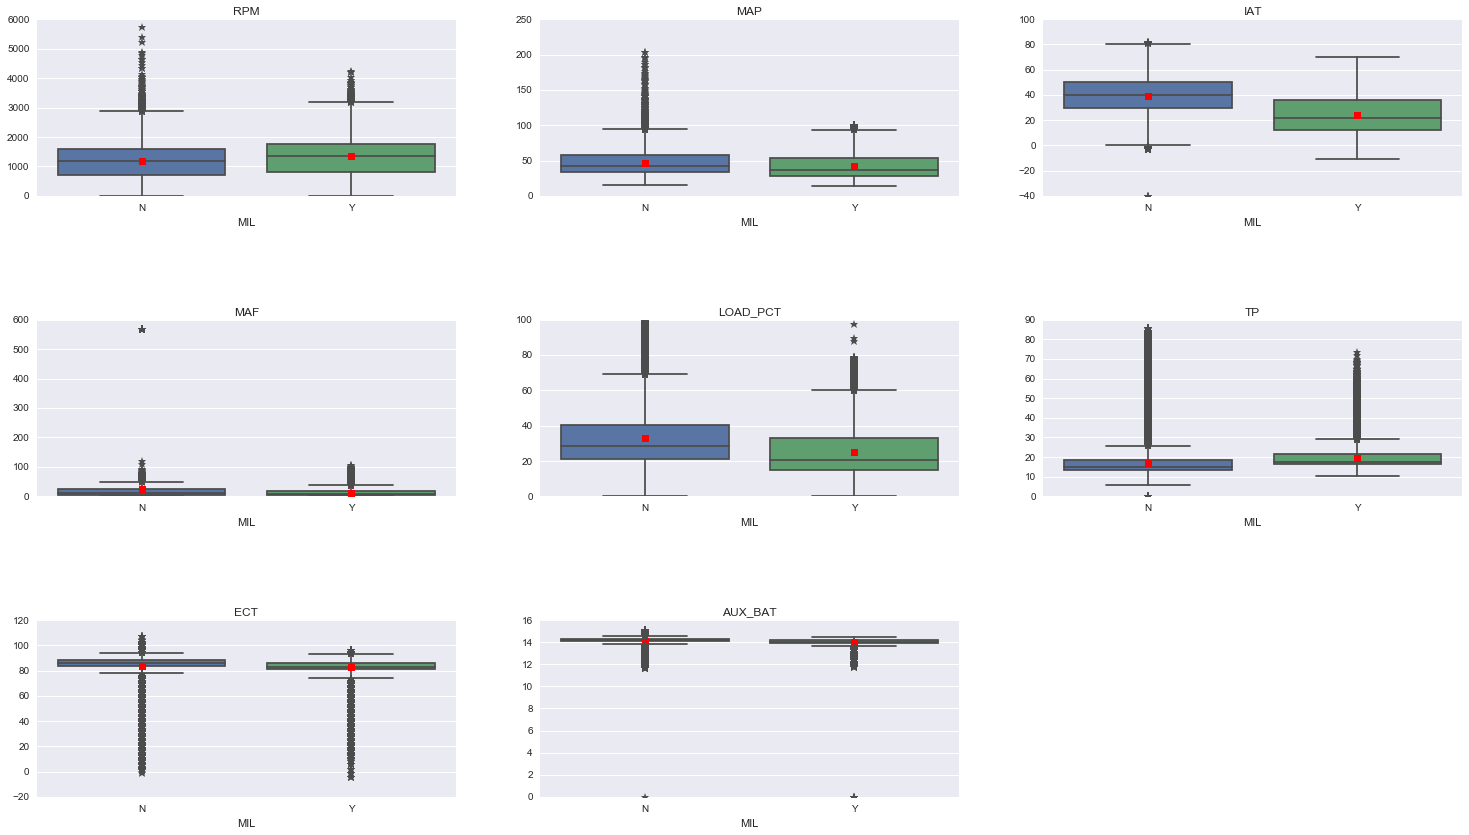

In [35]:
plot_boxwhisker_matrix(pid_raw)

GROUPBY 나 함수, 다른 방법써보기

## ::: Pre-Processing & EDA (2/)

+ remove outlier 

In [36]:
thres = [pid_raw.MAP.min(), 180] ; pid_raw = filter_df(pid_raw,'MAP', thres)
thres = [10,80] ; pid_raw = filter_df(pid_raw,'MAF', thres)
thres = [5, 35] ; pid_raw = filter_df(pid_raw,'TP', thres)
thres = [10,16] ; pid_raw = filter_df(pid_raw,'AUX_BAT', thres)

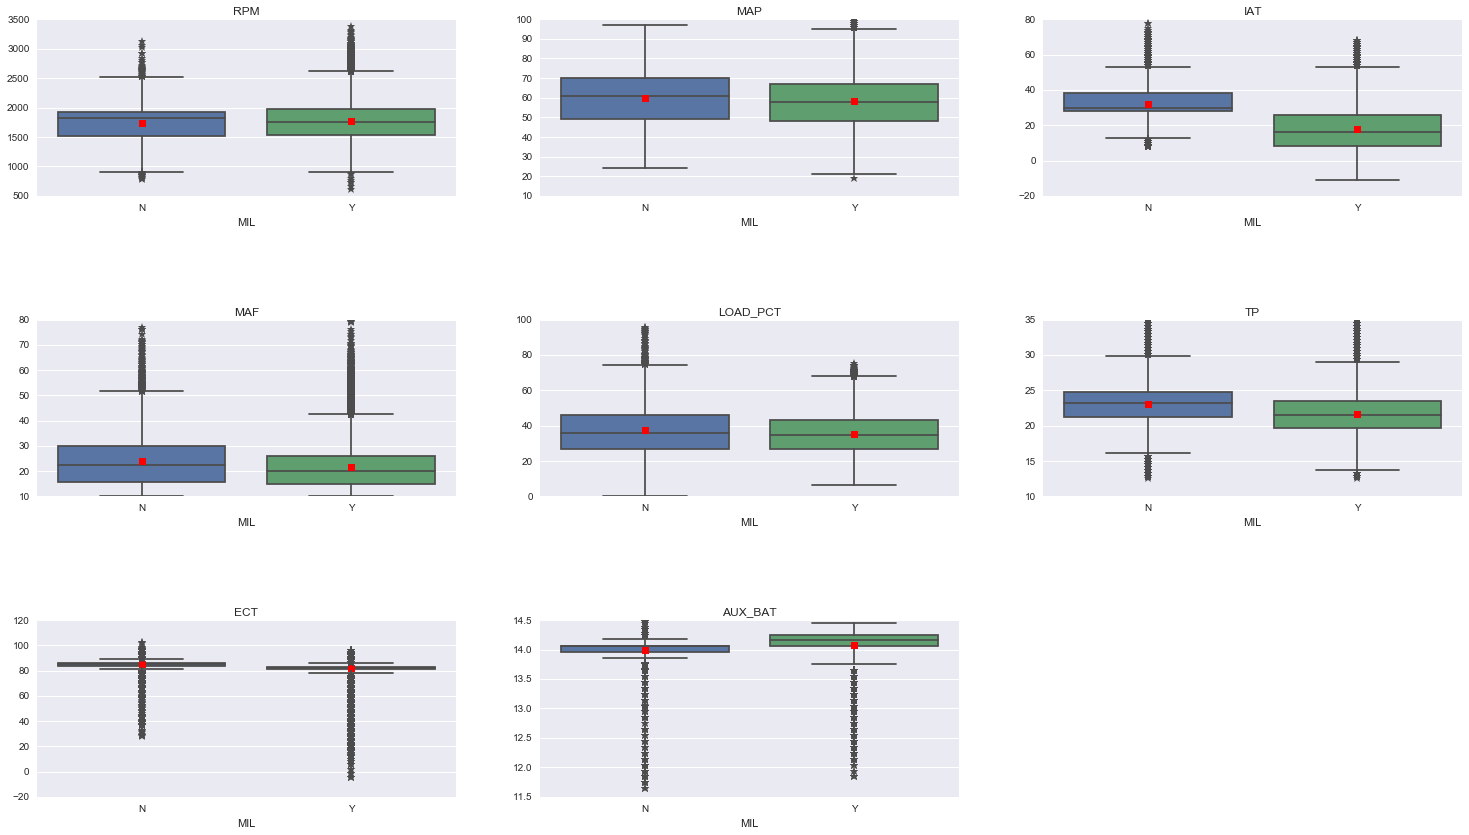

In [37]:
plot_boxwhisker_matrix(pid_raw)

/Users/Josh/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2296: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


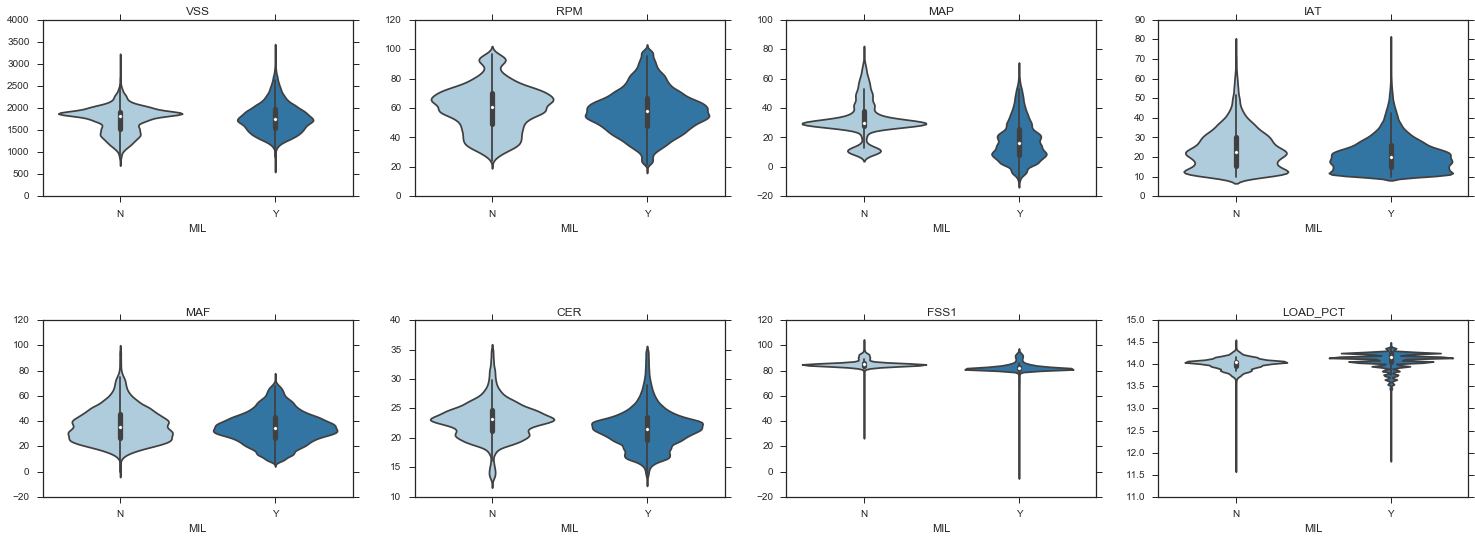

In [38]:
plot_violin_matrix(pid_raw)

>>> Multivariable Scatter_Matrix is acquired.


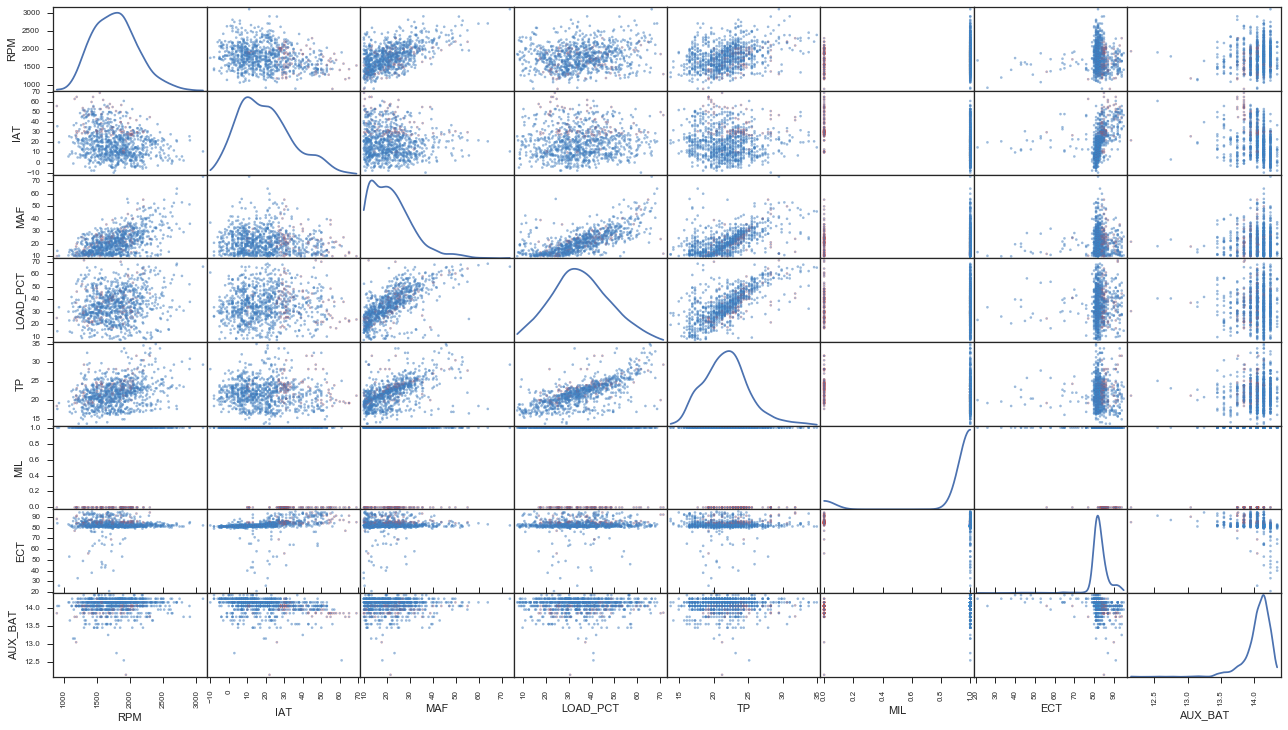

In [39]:
# Scatter Matrix
temp = pid_raw.sample(frac=0.01)
temp = temp.drop(['REPORT_DATE','CAR_NO','MAP'], axis=1)

plot_scatter_matrix(temp)

그림이 작고,,,Overlap 이 많아서 바로 분간 어려움

###  (3)Feature Engineering(Selection/Extraction): Curse of Dimensionality, Dimensionality Reduction, Correlation


- classification은 주어진 벡터 공간에서 칼로 자른다고 보면 됨. 어떤 벡터공간 (v1,v2,v3, ...)를 찾느냐가 중요함  
(~ 선형회귀에서 objective function에 유관한 설명변수를 찾는 과정도 유사)  
    - Classification 문제에서의 feature selection 중요성 [아티클](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)

- 거의 모든 머신러닝 기법에서 성능을 좌우하는 핵심적인 과정  
    - DeepLearning -> handpick feature를 쓰지 않는다는점에서 용이 (still, feature map을 뽑아내는등의 전처리는 여전히 중요)
- Overfitting/Underfitting 문제와도 연관(아래 Evalutation/Performance 참조) 

- Curse of Dimensionality [link1](http://freesearch.pe.kr/archives/3211) / [link2](http://m.blog.naver.com/wjddudwo209/80212077742)

- Feature selection by Dimensionality Reduction: PCA[내가만든자료], LDA/QDA, ...
    - QUIZZ: 늘 차원을 축소하는 방식으로만 분석하는게 좋을까?? [answer](https://www.quora.com/What-are-Kernels-in-Machine-Learning-and-SVM)
- **Feature selection by Correlation/Covariance: Covariance HeatMap (Today's Practice)**

- **Domain Knowledge -> TP-MAF/MAP**

### Trash-in, Trash-out 의 진정한 의미
- 문제정의를 명확히하지 않고
- 문제를 명확히 이해하지않고 (EDA)
- 해결을 위한 Data-set을 적절히(Feature selection,pre-precossing) 준비하지 않으면
- 아무것도 안나온다.
- 딥러닝 그거 쓰고 다 때려넣으면 다되잖아?!! 도깨비방망이 아닙니다. e.g. CNN(VISION): preprocessing/feature engineering이 실제 performance에 크게 영향을 미치니까, 아예 가장 좋은 feature map을 뽑아주는 convolution filter를 러닝하는 과정을 포함시킨것. [출처](http://sanghyukchun.github.io/75/)  


**변수간 상관관계 파악을 통한 Feature Selection(실습생략):**
![](./figures/fig3-cov.png)
![](./figures/fig3-cov_c.png)

 높은 상관성을 가지는 feature들은 중복되서 쓸필요 없고,  
 ACCEL_D와 같이 거의 모든 지표와 높은 상관성을 가지는 지표는 삭제해도된다.  
이 과정을 거쳐  `# Indexes in Use` 부분에서 적용.


** EDA 및 도메인 지슥을 통한 Feature Selection: (위 scatter matrix 참조)**
 

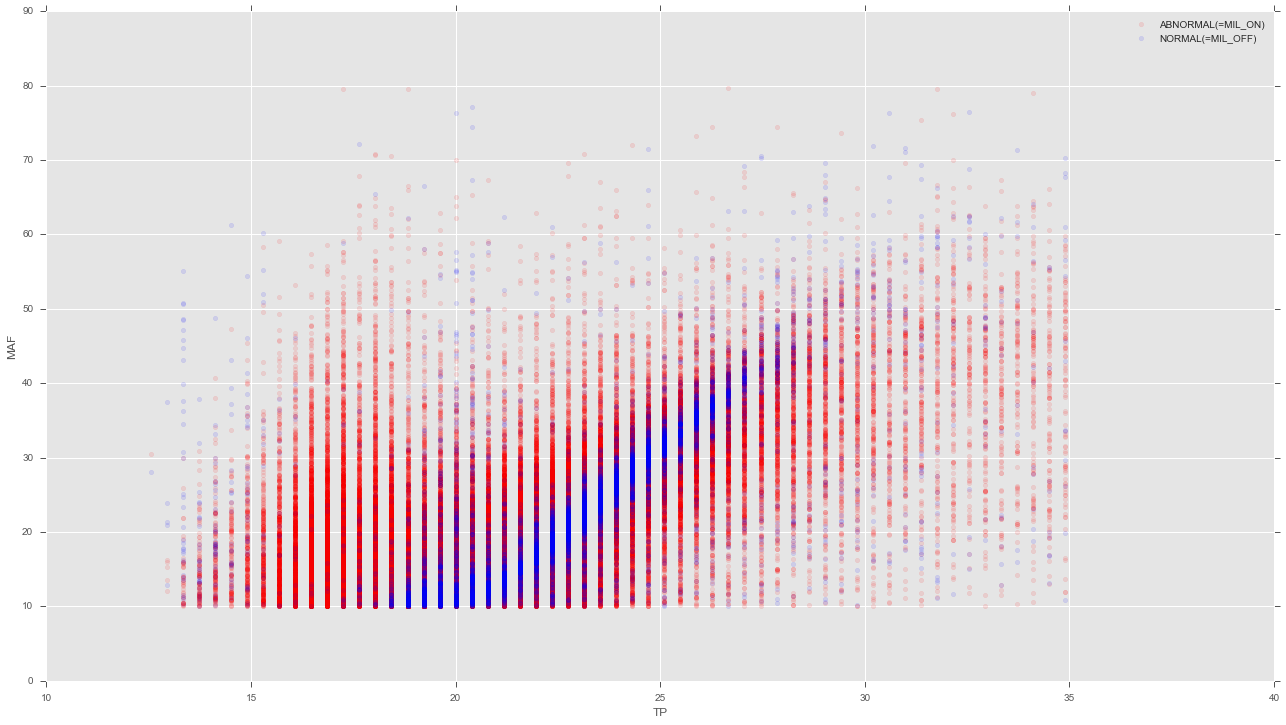

In [40]:
plot_scatter(pid_raw, 'TP','MAF')

## ::: Model Selection & Algorithm Fitting

- RandomForest/Decision Tree, SVM(w/ kernel), logistic regression, naive bayes classifier, ...
- sci-kit learn classifier performance [link](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
- 각 모델의 특장점/단점을 알고, 해당 case에 맞는 모델 선택 또는 다양한 모델 적용후 가장 perfomance 높은것 선택

![](./figures/fig4-classifiers.png)

본 예제에서는 RandomForest를 쓰기로 결정


**RandomForest:**
- multi-class
- real world performance 
- practical
- **automated feature selection**

![](./figures/fig4-ranking.png)
![](./figures/fig4-rf.png)

### (1) Data Preparation for Algorithm Fitting
- Train/(Validation)/Test set splitting
- NaN drop
- select data based on feature selection
- filtering for better performance

| *** The Linear Relationiship between TP & MAF: 
 MAF =(3.598154)*TP + (-59.473584)
| Standard_error :  14.1544479584
| treeDF_OFF_trunc.MAF value counts  :
  False    8542
True      874
Name: MAF, dtype: int64


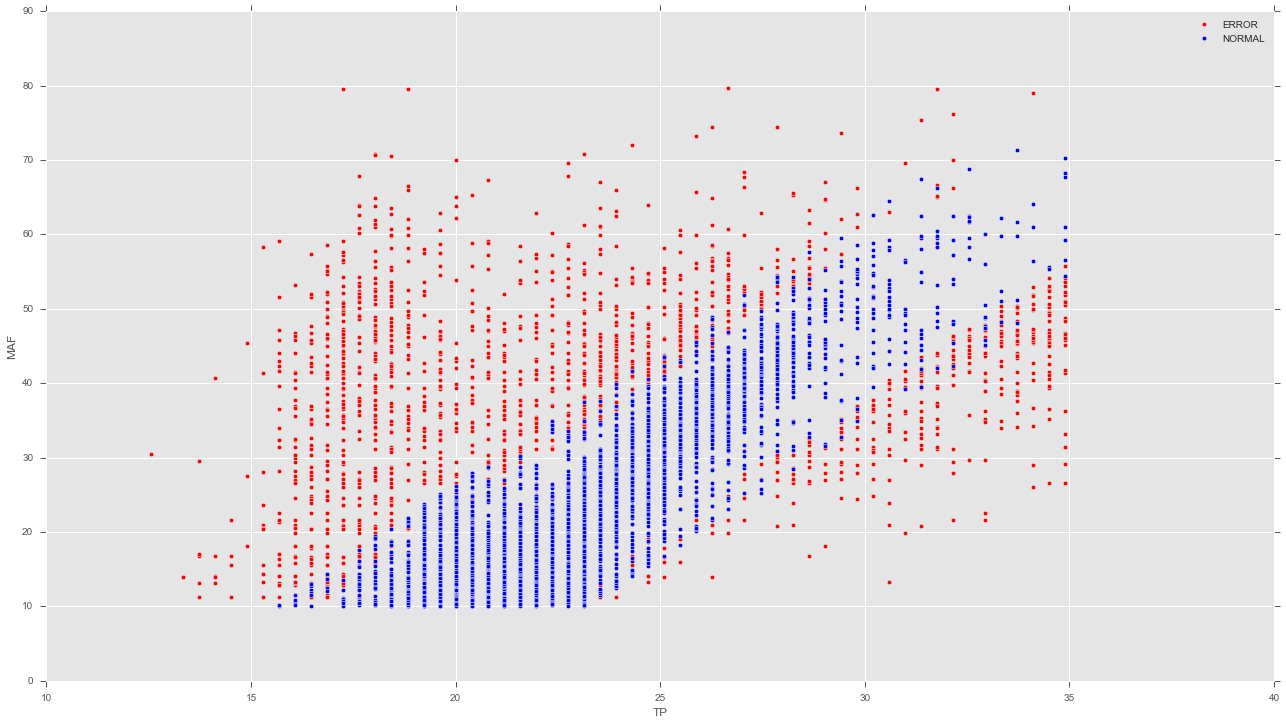

In [41]:
#prepare set
treeDF = pid_raw.copy()
treeDF = treeDF.dropna(axis=0) # decision tree not available when NaN exist

treeDF = treeDF.drop(['RPM','IAT','LOAD_PCT','LOAD_PCT','ECT','AUX_BAT','MAP'], axis = 1)
PID_features_target = ['TP','MAF' ] # among TP, MAP, MAF

""" :Encoding MIL into integers """
number = preprocessing.LabelEncoder()
treeDF['MIL'] = number.fit_transform(treeDF.MIL)

""" : split ON / OFF """
treeDF_ON = treeDF.loc[treeDF['MIL']==1]
treeDF_OFF = treeDF.loc[treeDF['MIL']==0]

trainDF_OFF, testDF_OFF = train_test_split(treeDF_OFF, test_size = 0.2, random_state = 42 )
trainDF_ON, testDF_ON = train_test_split(treeDF_ON, test_size = 0.2, random_state = 42 )

""" :Allocate Train & Test set """
# OFF train & test set
X_train_OFF = trainDF_OFF[PID_features_target[0]]; y_train_OFF = trainDF_OFF[PID_features_target[1]]
X_test_OFF = testDF_OFF[PID_features_target[0]]; y_test_OFF = testDF_OFF[PID_features_target[1]]
# ON train & test set
X_train_ON = trainDF_ON[PID_features_target[0]]; y_train_ON = trainDF_ON[PID_features_target[1]]
X_test_ON = testDF_ON[PID_features_target[0]]; y_test_ON = testDF_ON[PID_features_target[1]]

X_train_OFF = X_train_OFF.reshape(len(X_train_OFF),1); X_test_OFF = X_test_OFF.reshape(len(X_test_OFF),1)
y_train_OFF = y_train_OFF.reshape(len(y_train_OFF),1); y_test_OFF = y_test_OFF.reshape(len(y_test_OFF),1)

""" :Linear Regression + RANSAC Regressor """
# improving performance with RAandom SAmple Consensus
ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
ransac.fit(X_train_OFF, y_train_OFF)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Obtain parameters
theta = ransac.estimator_.coef_
intercept = ransac.estimator_.intercept_
std_error = np.sqrt( np.mean ( (ransac.estimator_.predict(X_test_OFF)-y_test_OFF)**2 ) )
conf_intv = 1.5 * std_error
print '| *** The Linear Relationiship between TP & MAF: \n MAF =(%f)*TP + (%f)' % (float(theta), intercept)
print '| Standard_error : ', conf_intv

""" : fitler out MIL_OFF dataframes with confidence interval """
treeDF_OFF_trunc = treeDF_OFF.copy()

# filter (1): linear & confidence interval
for index, row in treeDF_OFF_trunc.iterrows():
    if (row['MAF'] > theta * row['TP'] + intercept + conf_intv) or (row['MAF'] <  theta * row['TP'] + intercept - conf_intv) :
        treeDF_OFF_trunc.set_value(index, 'MAF', np.nan)
print '| treeDF_OFF_trunc.MAF value counts  :\n ', treeDF_OFF_trunc.MAF.isnull().value_counts()

# filter (2):  intersection
intersec_idx = treeDF_ON[(treeDF_ON['TP'].isin(treeDF_OFF_trunc['TP'])) & (treeDF_ON['MAF'].isin(treeDF_OFF_trunc['MAF'])) ].index
treeDF_ON_filtered = treeDF_ON.drop(intersec_idx)

for index, row in treeDF_ON_filtered.iterrows():
    if (row['MAF'] < theta * row['TP'] + intercept + 0.7*conf_intv) and (row['MAF'] >  theta * row['TP'] + intercept - 0.7*conf_intv) :
        treeDF_ON_filtered.set_value(index, 'MAF', np.nan)

if True:
    #verification by plot
    plt.figure(figsize = (22,12));
    plt.scatter(treeDF_ON_filtered.TP,treeDF_ON_filtered.MAF, alpha = 1 , c = 'r',label = "ERROR" )
    plt.scatter(treeDF_OFF_trunc.TP, treeDF_OFF_trunc.MAF, alpha = 1 , c = 'b',label = 'NORMAL')
    plt.legend();plt.xlabel('TP');plt.ylabel('MAF')

# final DF
treeDF_trunc = pd.concat([treeDF_OFF_trunc, treeDF_ON_filtered], axis = 0)

### (2) Algorithm Fitting

In [42]:
""" :Train & Test set """
treeDF_trunc  = treeDF_trunc.dropna(axis = 0)
trainDF, testDF = train_test_split(treeDF_trunc, test_size = 0.2, random_state = 42 )

y_train = trainDF["MIL"]
X_train = trainDF[PID_features_target]

y_test = testDF["MIL"]
X_test = testDF[PID_features_target]

""" :check ups"""
print "trainDF.MIL value_counts(): \n", trainDF['MIL'].value_counts()
print "testDF.MIL value_counts(): \n", testDF['MIL'].value_counts()

bdt = AdaBoostClassifier(DecisionTreeClassifier( max_depth= 3), n_estimators=3000 ) 
bdt.fit(X_train, y_train)


trainDF.MIL value_counts(): 
0    6842
1    1429
Name: MIL, dtype: int64
testDF.MIL value_counts(): 
0    1700
1     368
Name: MIL, dtype: int64


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=3000, random_state=None)

### (3) Evaluation

In [43]:
# Model Score
print "***model score(Train)*** : %f" % bdt.score(X_train,y_train)
print "***model score(Test)*** : %f" % bdt.score(X_test,y_test)

***model score(Train)*** : 1.000000
***model score(Test)*** : 0.985493


### (4) Visualization

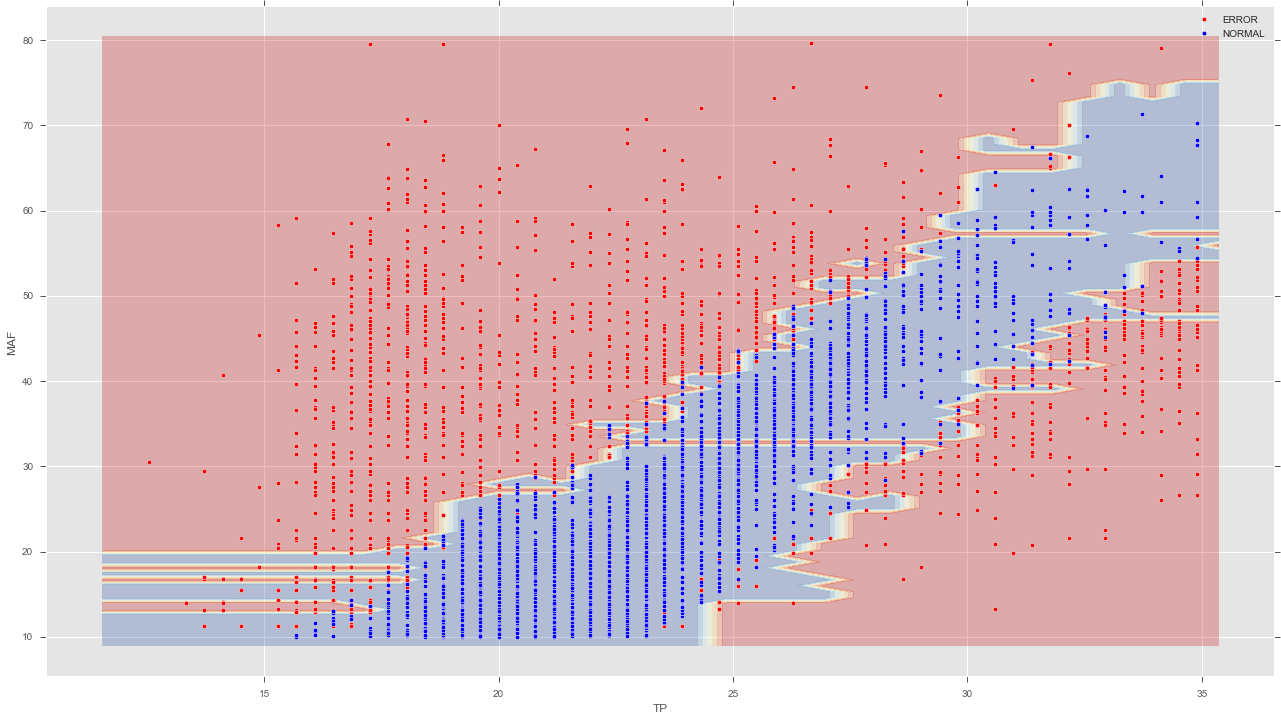

In [44]:
""" :ADT, Visualize """
plot_step = 0.7

x_min, x_max = treeDF_trunc['TP'].min() - 1, treeDF_trunc['TP'].max() + 1
y_min, y_max = treeDF_trunc['MAF'].min() - 1, treeDF_trunc['MAF'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape);
# from scipy import stats; print "Z: ", stats.describe(Z)

plot_decision_bounrary(xx,yy,Z, treeDF_ON_filtered, treeDF_OFF_trunc)

## :::(Optional) Optimization/Parameter Optimization

- [Coursera/Machine Learning, AndrewNg](https://www.coursera.org/learn/machine-learning) 참고

- parameter optimization for randomforest: [link](https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/) 

## :::Evaluation/Performance

- missclassification rate
- [ROC-AUC](http://blog.naver.com/PostView.nhn?blogId=y4769&logNo=220290361813) [+](http://pyopyo03.tistory.com/7) [1종오류2종오류](http://support.minitab.com/ko-kr/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/basics/type-i-and-type-ii-error/)   
- overfitting&underfitting / variance&bias

(ROC-AUC)
![](./figures/fig5-roc.png)

(Examples)
![](./figures/fig5-perf.png)

(perspective 1)
![](./figures/fig5-ab.png)
(perspective 2)
![](./figures/fig5-c.jpg)

- **Addressing high variance/bias problem** [link1](http://www.holehouse.org/mlclass/17_Large_Scale_Machine_Learning.html) / [link2](https://lotusthoughts.wordpress.com/2015/02/15/overfitting-underfitting-regularization/)

(high-bias)
    - more training set X
    - Add extra features
    - Add extra hidden units (if using neural networks)

(high-Variance)
    - more training set helps
    - remove features
    - regularization


# 3. Learn

##  ::: Constraints & Alternatives
- 문제가 해결하고자하는 범위와 더불어 현실상황에서 무엇이 안되면 그것을 명시하는 과정도 매우 중요.
- 본 케이스에서도 상황별 constraints를 정의햇었음
- 그리고 그에 맞는 대안을 제시하는 것도 한 방법

(한계 상황 일례)
![](./figures/fig6-const.png)


(대안 일례)
![](./figures/fig6-alt.png)

# III. 결론
- 완벽히 고장 원인 추론/ 탐지된다고는 할수 없지만
- 분석 과정을 통해 아래와 같은 결과물을 만들었다고 할 수 있음
[분석 최종 결과물 ]
![](./figures/fig7-a.png)
![](./figures/fig7-b.png)
![](./figures/fig7-c.png)



- 데이터 분석은 Plug&Play X, 조각하는 과정
[분석 과정 요약]
![](./figures/fig7-d.png)


- algorithm fitting은 전체 과정의 아주 협소한 부분. 문제 이해/정의/데이터 탐색/ 전처리 등이 프로세스의 과반.
- 구글링의 생활화

(end of document)